In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
data = df.drop('id', axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
features = data.columns.tolist()

In [6]:
features

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [7]:
data[features].isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
for feature in features:
    print({feature: data[feature].unique()})

{'gender': array(['Male', 'Female', 'Other'], dtype=object)}
{'age': array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.2

In [9]:
data['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [10]:
data.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [11]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data['smoking_status'].fillna(data['smoking_status'].mode()[0], inplace=True)

In [12]:
for feature in features:
    print({feature: data[feature].value_counts()})

{'gender': Female    2994
Male      2115
Other        1
Name: gender, dtype: int64}
{'age': 78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64}
{'hypertension': 0    4612
1     498
Name: hypertension, dtype: int64}
{'heart_disease': 0    4834
1     276
Name: heart_disease, dtype: int64}
{'ever_married': Yes    3353
No     1757
Name: ever_married, dtype: int64}
{'work_type': Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64}
{'Residence_type': Urban    2596
Rural    2514
Name: Residence_type, dtype: int64}
{'avg_glucose_level': 93.88     6
83.16     5
91.85     5
91.68     5
73.00     5
         ..
162.14    1
111.77    1
90.91     1
103.50    1
88.02     1
Name: avg_glucose_level, Length: 3979, dtype: int64}
{'bmi': 28.893237    201
28.700000     41
28.400000     38
27.6

In [13]:
data['smoking_status']

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109       never smoked
Name: smoking_status, Length: 5110, dtype: object

In [14]:
data['smoking_status'].value_counts()

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [15]:
le = LabelEncoder()

ec_data = data.apply(le.fit_transform)
ec_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1


In [16]:
y = ec_data['stroke']
X = ec_data.drop('stroke', axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.51, random_state = 2)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = model_rf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)*100
print(score)

95.2819332566168


In [23]:
message = "The accuracy score for this prediction model is: " + str(score)

In [24]:
print(message)

The accuracy score for this prediction model is: 95.2819332566168


/Users/linh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

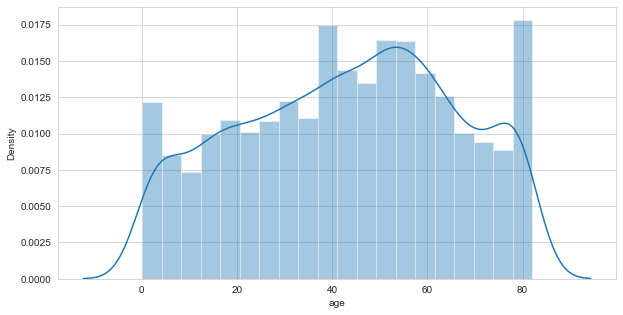

In [25]:
plt.figure(figsize = (10,5))
sns.distplot(a=data['age'], kde = True)

Text(0, 0.5, 'BMI')

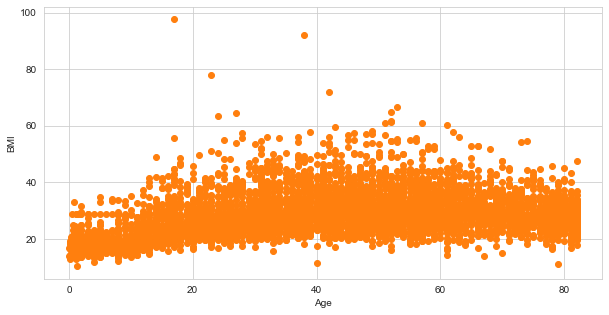

In [26]:
plt.figure(figsize = (10,5))
plt.scatter(data['age'], data['bmi'], c = '#ff7f0e')
plt.xlabel('Age')
plt.ylabel('BMI')

Text(0, 0.5, 'Average glucose level')

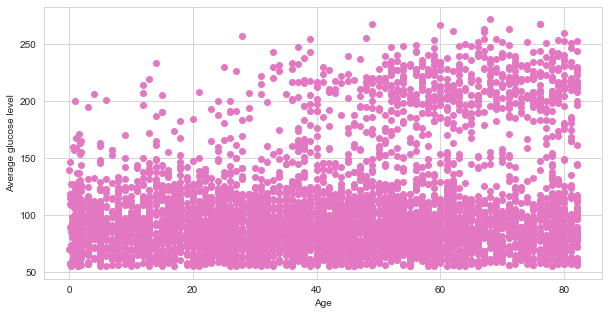

In [27]:
plt.figure(figsize = (10,5))
plt.scatter(data['age'], data['avg_glucose_level'], c = '#e377c2')
plt.xlabel('Age')
plt.ylabel('Average glucose level')

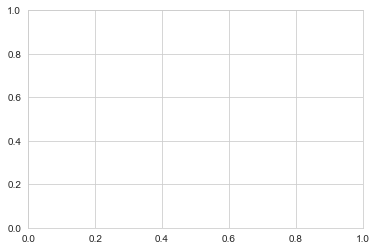

In [28]:
fig = plt.figure()
ax = plt.axes()

In [29]:
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.set(xlim=(0,10), ylim=(-2,2), xlabel='x', ylabel='sin(x)', title="A Simple Plot");